# DSCI 470 – Project 1

Due: Monday, October 3rd, 11:59pm.

In this project you will use prediction models to study house prices in Salt Lake City. We will use classification models to study the popularity of news.

## Your Data
Fill out the following information: 

*First Name: Blaine*   
*Last Name: Mason*  


## Part 1a: Gradient Descent
Using the mglearn make wave function with 100 samples, create a linear regression model $f$ using gradient descent that predicts the target value given the single feature. Your model should be of the form 

$$
f_{w,b}(\text{target}) = w*x+b, 
$$
where $x$ is feature. 

Remeber Gradient Descent utilizes the least squares cost function:

$$
J(w,b)=\frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x_i)-y_i)^2
$$

and we want to update:

$$
w=w-\alpha \frac{\partial}{\partial w}J(w,b)
$$
$$
b=b-\alpha \frac{\partial}{\partial b}J(w,b)
$$
**Question 1**: intilize your Gradient Descent algortihm. Choose a few different alpha values and use a countour diagram along with the parameters from each step of the algorithm to visualize what happens when the alpha value is to big or to small

**Question 2**: Pick the alpha value that gets you closest to the minimum in the fewest steps. Plot a scatter plot of the data and your model. Calculate the R squared value and report your interpertation

In [10]:
import numpy as np

def Cost(w,b,x,y):
    # We take in a w,b value and a vector of features x and the target y#
    
    C=.5*np.sum(((w*x+b)-y)**2)
    
    return C
def f(x,w,b):
    return w*x + b

# def step_gradient(b_current, m_current, points, learningRate):
#     b_gradient = 0
#     m_gradient = 0
#     N = float(len(points))
#     for i in range(0, len(points)):
#         x = points[i, 0]
#         y = points[i, 1]
#         b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
#         m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
#     new_b = b_current - (learningRate * b_gradient)
#     new_m = m_current - (learningRate * m_gradient)
#     return [new_b, new_m]



def gradientDescent(x, y, theta, learn_rate, N, n_iter):
    loss_i = np.zeros(n_iter)
    for i in range(n_iter):
        w = theta[0]
        b = theta[1]
        yhat = w*x+b
        loss = np.sum((yhat-y)** 2)/(2*N)
        loss_i[i] = loss
        print("i:%d, loss: %f" % (i, loss))

        gradient_w = np.dot(x,(yhat-y))/N
        gradient_b = np.sum((yhat-y))/N
        w = w - learn_rate*gradient_w
        b = b - learn_rate*gradient_b
        theta = [w,b]
    return theta,loss_i

w,b = gradientDescent(x.T,y,np.zeros(2),.0001, x.shape[0],100)

i:0, loss: 101765.000000
i:1, loss: 85543.286021
i:2, loss: 72082.741480
i:3, loss: 60905.108093
i:4, loss: 51616.426885
i:5, loss: 43891.924677
i:6, loss: 37463.655304
i:7, loss: 32110.385277
i:8, loss: 27649.309640
i:9, loss: 23929.261454
i:10, loss: 20825.141235
i:11, loss: 18233.343620
i:12, loss: 16067.999830
i:13, loss: 14257.888060
i:14, loss: 12743.891134
i:15, loss: 11476.902907
i:16, loss: 10416.102927
i:17, loss: 9527.533523
i:18, loss: 8782.925434
i:19, loss: 8158.727867
i:20, loss: 7635.306801
i:21, loss: 7196.281882
i:22, loss: 6827.977543
i:23, loss: 6518.968351
i:24, loss: 6259.702138
i:25, loss: 6042.187365
i:26, loss: 5859.733615
i:27, loss: 5706.736000
i:28, loss: 5578.495951
i:29, loss: 5471.072125
i:30, loss: 5381.156288
i:31, loss: 5305.969916
i:32, loss: 5243.177990
i:33, loss: 5190.817082
i:34, loss: 5147.235314
i:35, loss: 5111.042193
i:36, loss: 5081.066677
i:37, loss: 5056.322085
i:38, loss: 5035.976722
i:39, loss: 5019.329269
i:40, loss: 5005.788143
i:41, lo

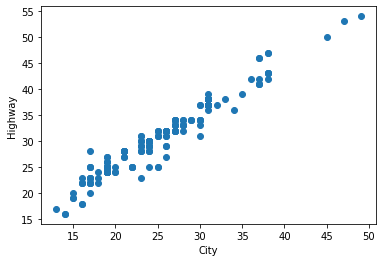

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" 
_df=pd.read_csv(url, header=None)
_df[1:10]
d = _df.values


x=_df[23].to_numpy()
x=np.reshape(x, (len(x), 1))



y=_df[24].to_numpy()
y=np.reshape(y, (len(y), 1))

plt.scatter(x,y)
plt.xlabel("City");
plt.ylabel("Highway");


## Part 1b: Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in 2015-16 in zip code 84103 ([SLC avenues neighborhood](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (`property size`, `house size`, `number of bedrooms`, etc...). 


### Task 1.1: Import the data 
Use the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to import the dataset. The data is contained in two files located in the same directory as this notebook: [`train1.csv`](train1.csv) and [`train2.csv`](train2.csv). After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [307]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
sns.set()

# imports ski-kit modules
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [ ]:
# your code goes here

### Task 1.2: Clean the data 

1. There are 206 different variables associated with each of the 348 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

+ Only keep houses with List Price between 250,000 and 1,000,000 dollars. This is an arbitrary choice and we realize that some people are high rollers, but for our purposes we'll consider the others as outliers. 

+ Remove columns that you don't think contribute to the value of the house. This is a personal decision – what attributes of a house are important to you? 
You should at least keep the following variables since the questions below will use them: 
`['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'DaysOnMkt', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']` 

+ Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [`str.replace()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values. In particular, convert 'TotSqf' to an integer and add a column titled `Prop_Type_num` that is 
$$
\text{Prop_Type_num}_i = \begin{cases} 
0 & \text{if $i$-th listing is a condo or townhouse} \\
1 & \text{if $i$-th listing is a single family house}
\end{cases}. 
$$
+ Remove the listings with erroneous `Longitude` (one has Longitude = 0) and `Taxes` values (two have unreasonably large values).

In [ ]:
# your code goes here

### Task 1.3: Exploratory data analysis 

1. Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable. 

+ Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

+ Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see `vmin` and `vmax` parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html))
    - Show a legend
    - Make sure the proper labels are visible and readable (see [`xticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [`yticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html).

+ Make a scatter plot matrix to visualize the correlations. Color-code the dots by property type. For the plot, only use a subset of the columns: `['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']`. Determine which columns have strong correlations. 

+ Describing your findings. 


In [ ]:
# your code goes here

In [ ]:
# your code goes here

**Your Interpretation:** TODO

### Task 1.4: Geospatial plot
Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of lat and long makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

What can you say about the relation between the location and the house price?
 

In [ ]:
# your code goes here

**Your Interpretation:** TODO

### Task 1.5: Machine Learning K-Nearest Neighbors (KNN)

Develop a k-NN regression model for predicting selling price from Taxes. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? Plot graph of accuracy with various values of k to show your result


In [ ]:
# your code goes here

**Your Interpertation** TODO

### Task 1.6: Machine Learning Linear Regression 

Use the linear regression model from the sklearn package to regress the Sold price based on the Taxes. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is the Taxes for the property. 

Report the R-squared value for this model (`SoldPrice ~ Taxes`) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a scatterplot of Taxes vs. sold price and overlay the prediction coming from your regression model. Which model preforms better KNN or regression? 

In [ ]:
# your code goes here

**Your Interpretation:** TODO

### Task 1.7: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Prop_Type. Your model should be of the form:
$$
\text{Sold Price} = b + w_1 x_1 + w_2 x_2 + \cdots +  w_n x_n, 
$$
where $x_i$ are predictive variables.


**Question 1**: If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare? 

Next look at the difference between list price and sold price explicitly. Calculate two new columns for your dataset. `DiffPriceAbsolute` and `DiffPriceRelative`.

* `DiffPriceAbsolute` - This is difference between sold price and list price. If it is positive, that means the house sold for more than it was listed at.
* `DiffPriceRelative` - This is the relative difference between sold price and list price. A value of 1.1 here means that the house sold for 110% of the asking price, and 0.9 means the house sold for 90% of the asking price.

Now, create two new models. One to predict `DiffPriceAbsolute`, and one to predict `DiffPriceRelative`. Use the same predictive variables as in the last model.


**Question 2**: Which of these two new models makes better predictions.

**Question 3**: Based on your answer to question two, why are these models different/the same.

To help justify your answer to question 3, train two models to predict `DiffPriceAbsolute` and `DiffPriceRelative` based on just `SoldPrice`. In addition, for each model make a scatterplots similar to Task 6 for these models.

In [ ]:
# your code goes here

In [ ]:
# your code goes here

In [ ]:
# your code goes here

**Your Interpretation:** TODO - answer Questions 1, 2, and 3

### Task 1.8: Incorporating a categorical variable

Above, we considered houses, townhouses, and condos together, but here we'll distinguish between them. Consider the two regression models: 
$$
\text{SoldPrice} = \beta_0 + \beta_1 \text{Prop_Type_num}
$$
and 
$$
\text{SoldPrice} = \beta_0  + \beta_1 \text{Prop_Type_num} + \beta_2 \text{TotSqf}
$$

Explian the difference between the two models and if the catgorical variable gives you any additional predictive power.

In [ ]:
# your code goes here

**Your Interpretation:** TODO

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset. Then, **print** shape of the data and first few lines of data.
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.
* Print *y* array

In [ ]:
# your code goes here

### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [ ]:
# your code goes here

### Task 2.3 Classification using k-NN
Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? Plot graph of accuracy with various values of k to show your result.

In [ ]:
# your code goes here

### Task 2.4 Classification using SVM
Develop a support vector machine classification model for the data.Show the results of cross-validation along with best parameter at the end.

Hint: SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 4,000 articles. It takes multiple minutes to run on the whole dataset.

In [ ]:
# your code goes here

### Task 2.5 Classification using Multinomial Logistic Regression

Develop a logistic regression model for the data. Show the results for different penalty wieghts along with the best weight for the penalty at the end. 

In [ ]:
# your code goes here

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 
Show the results of cross-validation along with best parameter at the end.
* we don't need a plot here, we only need cross validation output and the optimal setting of parameters.

In [ ]:
# your code goes here

### Task 2.6 Describe your findings

1. Which method (k-NN, SVM, Multinomial Logistic Regression, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?

**Your Interpretation:** TODO